30000


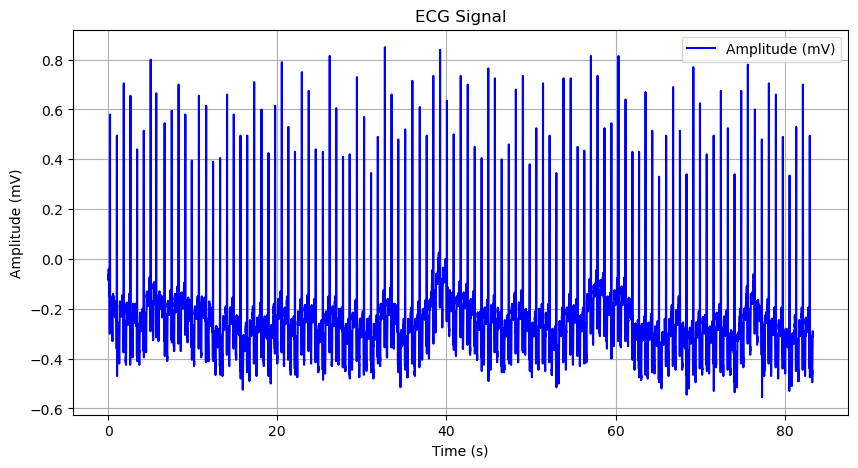

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


ecg = pd.read_csv(r'C:\Users\SCD UM\Downloads\ECG_long_360Hz.txt', header=None).squeeze()  

# Fréquence d'échantillonnage
Fe = 360  # en Hz

# Création de l'axe du temps
time_axis = [i / Fe for i in range(len(ecg))]  # Temps en secondes

N = len(ecg)
print(N)

# Tracé de l'ECG
plt.figure(figsize=(10, 5))
plt.plot(time_axis, ecg, label='Amplitude (mV)', color='blue')
plt.xlabel('Time (s)')  # Axe des abscisses : Temps
plt.ylabel('Amplitude (mV)')  # Axe des ordonnées : Voltage
plt.title('ECG Signal')
plt.grid()
plt.legend()
plt.show()


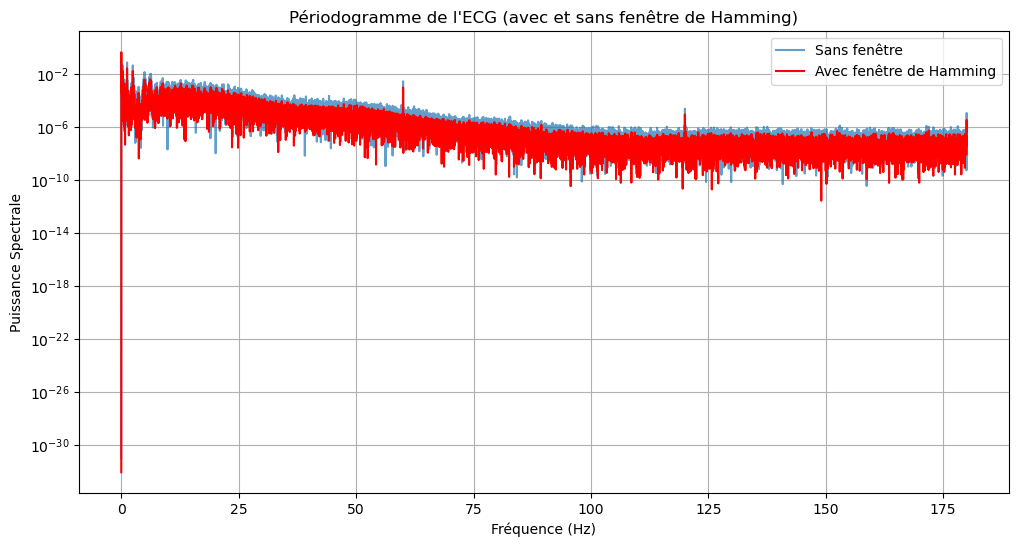

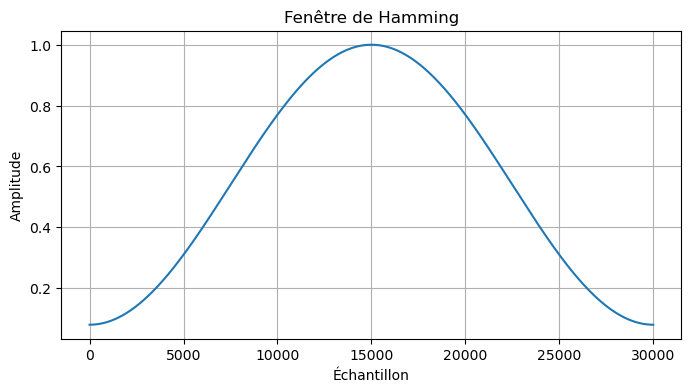

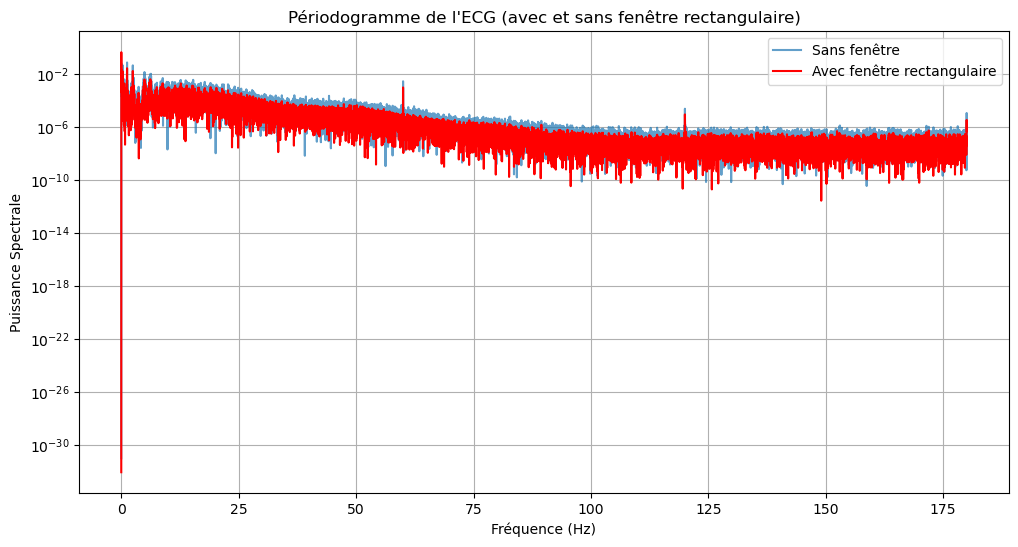

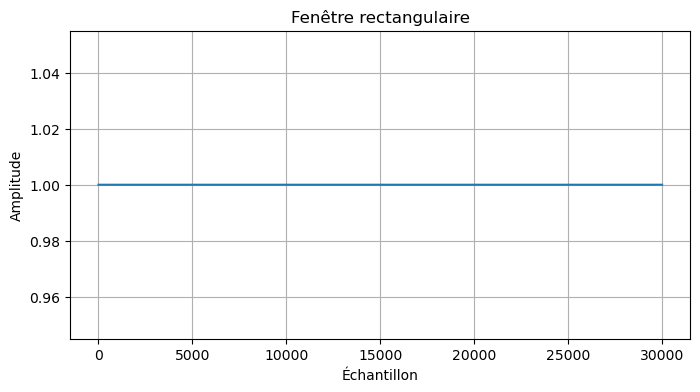

In [4]:
import numpy as np
from scipy.signal import periodogram
from numpy.fft import fft, fftshift
from scipy.fft import fft, fftshift
from scipy.signal import windows


window = np.hamming(N)

# Application de la fenêtre
ecg_windowed = ecg * window

# Calcul du périodogramme (signal avec et sans fenêtre de Hamming)
frequencies, power = periodogram(ecg, Fe)
frequencies_win, power_win = periodogram(ecg_windowed, Fe)

# Tracé du périodogramme
plt.figure(figsize=(12, 6))
plt.semilogy(frequencies, power, label="Sans fenêtre", alpha=0.7)
plt.semilogy(frequencies_win, power_win, label="Avec fenêtre de Hamming", color='red')
plt.title('Périodogramme de l\'ECG (avec et sans fenêtre de Hamming)')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Puissance Spectrale')
plt.grid()
plt.legend()
plt.show()

# Tracé de la fenêtre de Hamming
plt.figure(figsize=(8, 4))
plt.plot(window)
plt.title("Fenêtre de Hamming")
plt.xlabel("Échantillon")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


window_2 = windows.boxcar(N)

# Application de la fenêtre
ecg_windowed_2 = ecg * window_2

# Calcul du périodogramme (signal avec et sans fenêtre rectangulaire)
frequencies, power = periodogram(ecg, Fe)
frequencies_win, power_win = periodogram(ecg_windowed, Fe)

# Tracé du périodogramme
plt.figure(figsize=(12, 6))
plt.semilogy(frequencies, power, label="Sans fenêtre", alpha=0.7)
plt.semilogy(frequencies_win, power_win, label="Avec fenêtre rectangulaire", color='red')
plt.title('Périodogramme de l\'ECG (avec et sans fenêtre rectangulaire)')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Puissance Spectrale')
plt.grid()
plt.legend()
plt.show()

# Tracé de la fenêtre rectangulaire
plt.figure(figsize=(8, 4))
plt.plot(window_2)
plt.title("Fenêtre rectangulaire")
plt.xlabel("Échantillon")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


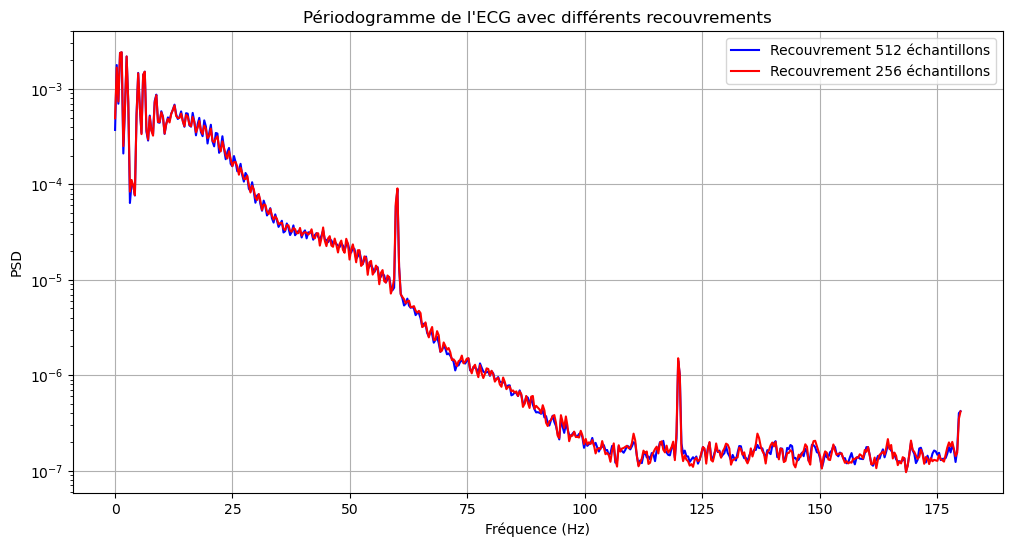

In [6]:
from scipy import signal

# Application de la méthode de Welch avec recouvrement
nperseg = 1024  # Taille des segments
noverlap_1 = 512  # Recouvrement de 512 échantillons
noverlap_2 = 256  # Recouvrement de 256 échantillons

# Périodogramme avec un recouvrement de 512 échantillons
f1, Pxx_den_1 = signal.welch(ecg, Fe, nperseg=nperseg, noverlap=noverlap_1)

# Périodogramme avec un recouvrement de 256 échantillons
f2, Pxx_den_2 = signal.welch(ecg, Fe, nperseg=nperseg, noverlap=noverlap_2)

# Tracé des périodogrammes avec différents recouvrements
plt.figure(figsize=(12, 6))

# Tracé pour recouvrement de 512 échantillons
plt.semilogy(f1, Pxx_den_1, label="Recouvrement 512 échantillons", color='blue')

# Tracé pour recouvrement de 256 échantillons
plt.semilogy(f2, Pxx_den_2, label="Recouvrement 256 échantillons", color='red')

# Titre et étiquettes
plt.title('Périodogramme de l\'ECG avec différents recouvrements')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('PSD')
plt.grid()
plt.legend()
plt.show()


In [16]:
pip install plotly

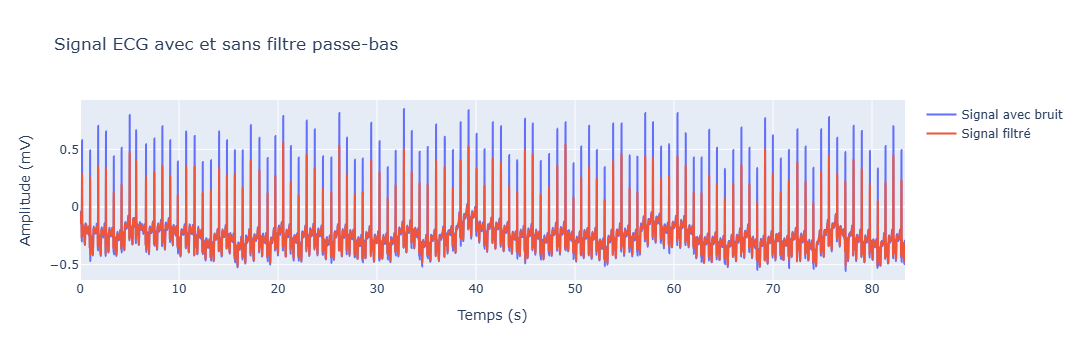

In [20]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy.signal import butter, filtfilt

# Fréquence d'échantillonnage (Fe) - Exemple, à ajuster si nécessaire
Fe = 360  # Fréquence d'échantillonnage en Hz
T = 1 / Fe  # Période d'échantillonnage
cutoff = 20  # Fréquence de coupure du filtre en Hz
nyq = 0.5 * Fe  # Fréquence de Nyquist
order = 6  # Ordre du filtre
n = int(T * Fe)  # Nombre d'échantillons (en fonction de la durée)

# Fonction de filtre passe-bas Butterworth
def butter_lowpass_filter(ecg, cutoff, Fe, order):
    normal_cutoff = cutoff / nyq  # Calcul de la fréquence de coupure normalisée
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, ecg)  # Appliquer le filtre
    return y

# Lecture des données ECG (exemple, à ajuster selon le chemin et format)
ecg = pd.read_csv(r'C:\Users\SCD UM\Downloads\ECG_long_360Hz.txt', header=None).squeeze()

# Créer l'axe du temps
time_axis = np.arange(len(ecg)) / Fe  # L'axe du temps en secondes

# Appliquer le filtre passe-bas
y = butter_lowpass_filter(ecg, cutoff, Fe, order)

# Tracer les signaux sur deux graphiques séparés
fig = go.Figure()

# Tracé du signal d'origine (ECG avec bruit)
fig.add_trace(go.Scatter(
    x=time_axis,
    y=ecg,
    line=dict(shape='spline'),
    name='Signal avec bruit',
    mode='lines'
))

# Tracé du signal filtré (après application du filtre passe-bas)
fig.add_trace(go.Scatter(
    x=time_axis,
    y=y,
    line=dict(shape='spline'),
    name='Signal filtré',
    mode='lines'
))

# Mise en forme du graphique
fig.update_layout(
    title="Signal ECG avec et sans filtre passe-bas",
    xaxis_title="Temps (s)",
    yaxis_title="Amplitude (mV)",
    showlegend=True
)

# Affichage du graphique
fig.show()


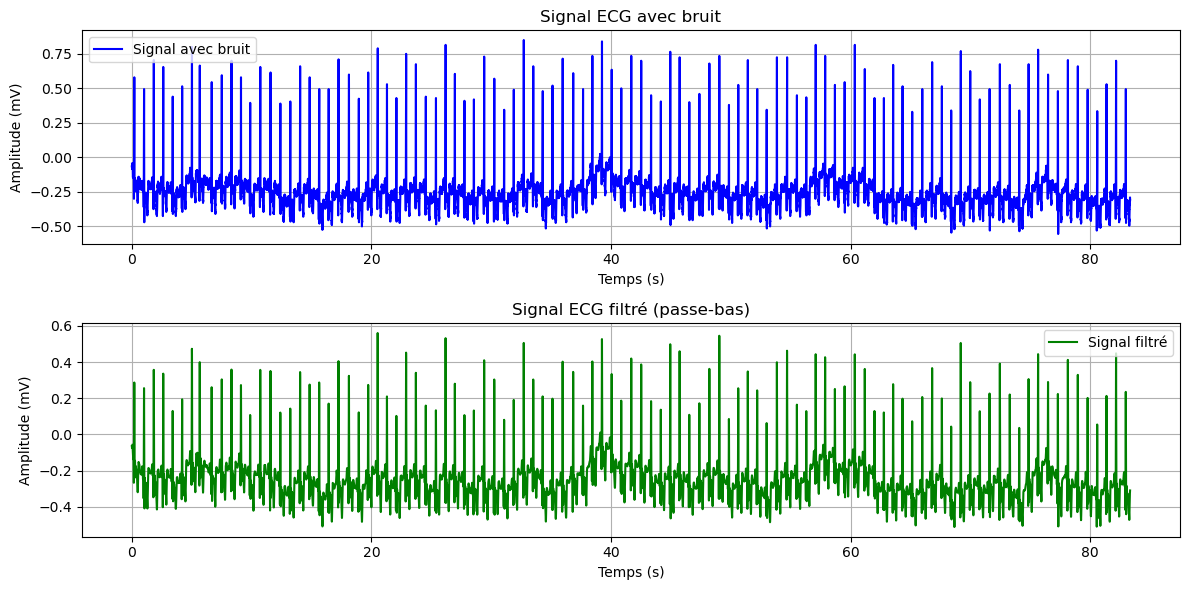

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Fréquence d'échantillonnage (Fe) - Exemple, ajustez selon votre signal ECG
Fe = 360  # Fréquence d'échantillonnage en Hz
T = 1 / Fe  # Période d'échantillonnage
cutoff = 20  # Fréquence de coupure du filtre en Hz
nyq = 0.5 * Fe  # Fréquence de Nyquist
order = 6  # Ordre du filtre
n = int(T * Fe)  # Nombre d'échantillons (en fonction de la durée)

# Fonction de filtre passe-bas Butterworth
def butter_lowpass_filter(ecg, cutoff, Fe, order):
    normal_cutoff = cutoff / nyq  # Calcul de la fréquence de coupure normalisée
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, ecg)  # Appliquer le filtre
    return y

# Lecture des données ECG (exemple, ajustez selon le chemin et format)
ecg = pd.read_csv(r'C:\Users\SCD UM\Downloads\ECG_long_360Hz.txt', header=None).squeeze()

# Créer l'axe du temps
time_axis = np.arange(len(ecg)) / Fe  # L'axe du temps en secondes

# Appliquer le filtre passe-bas
y = butter_lowpass_filter(ecg, cutoff, Fe, order)

# Tracé des signaux
plt.figure(figsize=(12, 6))

# Tracé du signal d'origine (ECG avec bruit)
plt.subplot(2, 1, 1)
plt.plot(time_axis, ecg, label="Signal avec bruit", color='blue')
plt.title("Signal ECG avec bruit")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude (mV)")
plt.grid()
plt.legend()

# Tracé du signal filtré (après application du filtre passe-bas)
plt.subplot(2, 1, 2)
plt.plot(time_axis, y, label="Signal filtré", color='green')
plt.title("Signal ECG filtré (passe-bas)")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude (mV)")
plt.grid()
plt.legend()

# Ajustement des espaces entre les graphiques
plt.tight_layout()

# Affichage du graphique
plt.show()
